In [1]:
from common import model
from common import dataset
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import config as cfg

Using TensorFlow backend.


In [2]:
my_dataset = dataset.MyDataset(
  collection_name = cfg.dataset['collection_name']
)

my_model = model.MyModel(
  arch = cfg.model['arch'],
  loss_function = cfg.model['loss_fn'],
  checkpoint = cfg.model['checkpoint'],
  width = cfg.dataset['width'],
  height = cfg.dataset['height'],
  depth = cfg.dataset['depth'],
  epochs = cfg.model['epochs'],
  filters = cfg.model['filters']
)

W0812 13:12:03.376845 140197021054784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 13:12:03.388900 140197021054784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 13:12:03.392278 140197021054784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 13:12:03.760246 140197021054784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 13:12:03.764456 140197021054784 deprecation_wrappe

In [3]:
train_generator, test_generator = my_dataset.create_test_train_gen()
my_model.load()
my_model.get_model_summary()

W0812 13:12:03.864743 140197021054784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 64, 64, 1 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 48, 64, 64, 4 112         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 48, 64, 64, 4 0           conv3d_1[0][0]                   
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 48, 64, 64, 4 436         activation_1[0][0]               
__________________________________________________________________________________________________
conv3d_3 (

In [14]:
predicted = my_model.evaluate(test_generator)
preds_bin = (predicted > 0.5).astype(np.uint8)

1/1 [==============================] - 0s 255ms/step
[0.06420320272445679, 0.9733806252479553]
1/1 [==============================] - 0s 254ms/step


In [15]:
test_image, test_mask = test_generator.__getitem__(0)

test_image.shape
image = test_image[0].squeeze()

image_0 = image[25, :, :]
image_1 = image[:, 25, :]
image_2 = image[:, :, 25]

image.shape

(48, 64, 64)

In [16]:
test_mask.shape
mask = test_mask[1].squeeze()

mask_0 = mask[25, :, :]
mask_1 = mask[:, 25, :]
mask_2 = mask[:, :, 25]

mask.shape

(48, 64, 64)

In [17]:
pred = preds_bin[1].squeeze()
pred_0 = pred[25, :, :]
pred_1 = pred[:, 25, :]
pred_2 = pred[:, :, 25]

preds_bin.shape

(12, 48, 64, 64, 1)

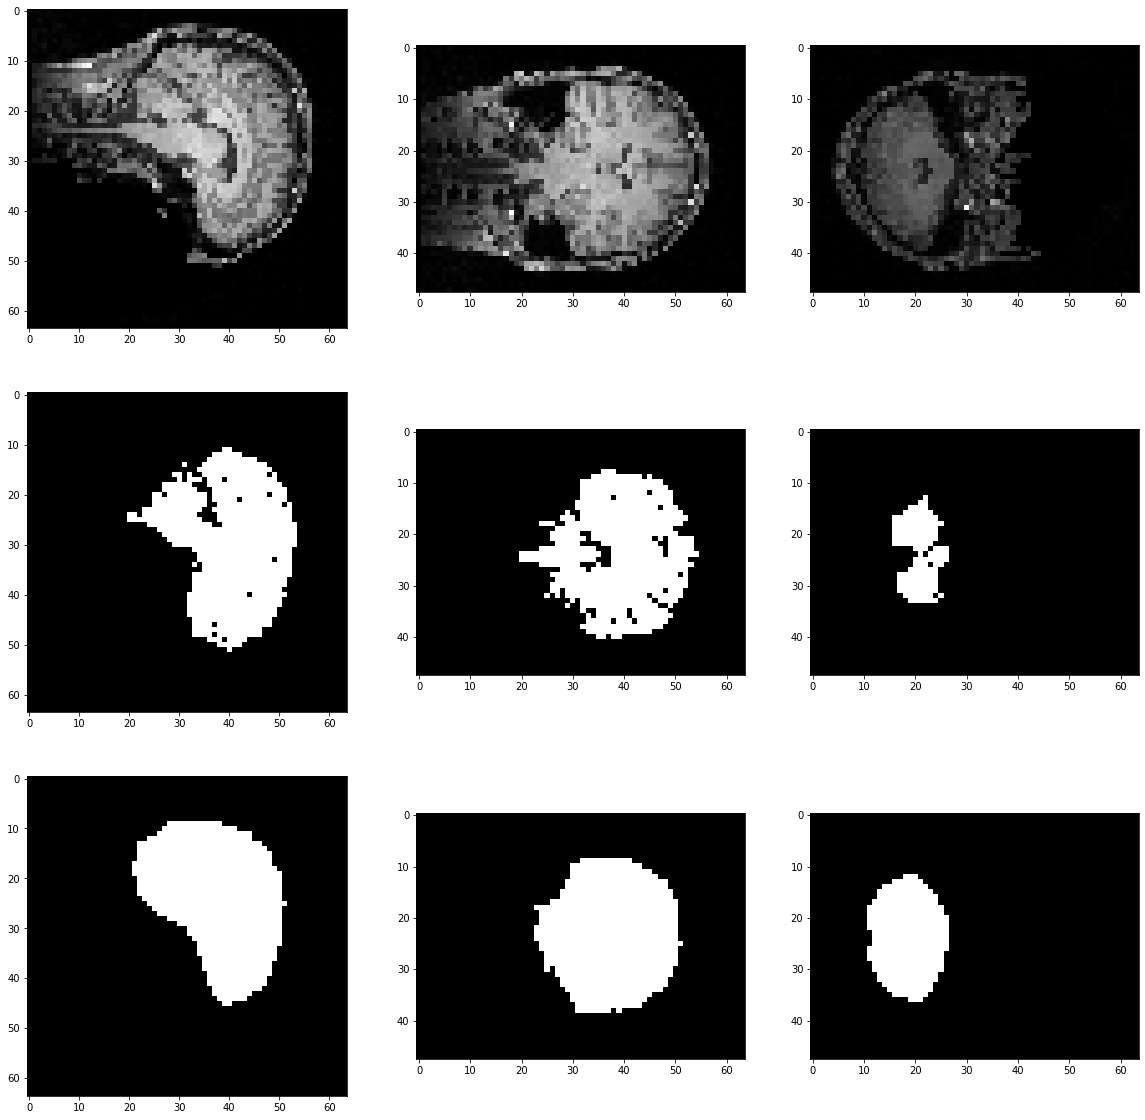

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

ax[0][0].imshow(image_0, cmap='gray')
ax[0][1].imshow(image_1, cmap='gray')
ax[0][2].imshow(image_2, cmap='gray')

ax[1][0].imshow(mask_0, cmap='gray')
ax[1][1].imshow(mask_1, cmap='gray')
ax[1][2].imshow(mask_2, cmap='gray')

ax[2][0].imshow(pred_0, cmap='gray')
ax[2][1].imshow(pred_1, cmap='gray')
ax[2][2].imshow(pred_2, cmap='gray')